In [2]:
import numpy as np
from scipy.interpolate import BSpline
import matplotlib.pyplot as plt

In [3]:
T = 302
K = 1.38065*1e-23
q = 1.6022 * 1e-19
A = 2.15
#Np = np.array([1,3,4,8,10,12,14,17,19,22])
Np = np.array([22,19,17,14,12,10,8,4,3,1])

#ns = np.array([27,25,24,20,18,16,14,11,9,6])
ns = np.array([6,9,11,14,16,18,20,24,25,27])
Iph = 1e-4
#Irs = np.array([1e-18, 1e-18,1e-18,1e-18,1e-19,1e-19,1e-19,1e-19,1e-20,1e-20])
Irs = np.array([1e-20,1e-20,1e-19,1e-19,1e-19,1e-19,1e-18, 1e-18,1e-18,1e-18])

V0 = np.linspace(0,55,100)


In [4]:
total_current = []
for i,j,k in zip(Np,Irs,ns):
    
    current = i*Iph - i*j*np.exp((q*V0/(K*T*A*k))-1)
    spl = BSpline(V0, current, 4)
    
    total_current.append(spl(V0))

In [5]:
power = []
for current in total_current:
    power.append(current*V0)

In [6]:
len(total_current)

10

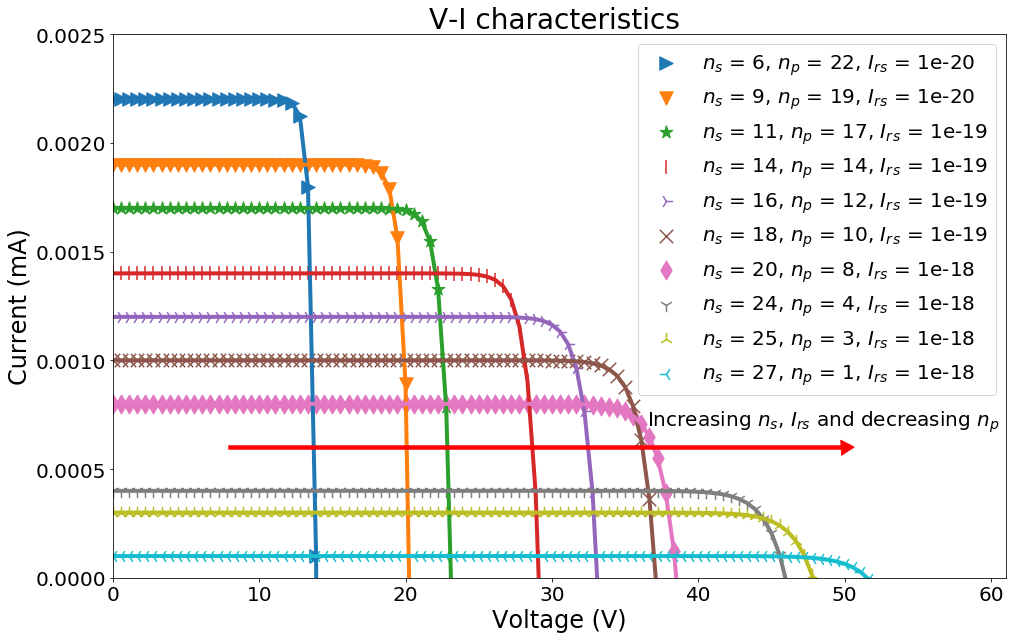

In [7]:
markers = ['>','v','*','|','4','x','d','1','2','3','D','P']
fig, ax = plt.subplots(figsize=(16,10))
x_label = [8, 50.0]
y_label = [0.0006, 0.0006]

text_cord = [36.5, 0.0007]

for k,i in enumerate(total_current):
    ax.scatter(V0,i, marker=markers[k], s=2**7.5,
               label='$n_s$ = {}, $n_p$ = {}, $I_r$$_s$ = {}'.format(ns[k],Np[k],Irs[k]))
    ax.plot(V0,i,linewidth=4)
    ax.set_ylim(0,0.0025)
    ax.set_xlim(0,61)
ax.plot(x_label, y_label,linewidth=4.5,c='red')  
ax.scatter(x_label[1], y_label[1],marker = (3,0,135+18), s=300,c='red')
ax.text(text_cord[0], text_cord[1] , "Increasing $n_s$, $I_{rs}$ and decreasing $n_p$",rotation=0,fontsize=20)
plt.legend(loc=1, prop={'size': 20.0})   
plt.title('V-I characteristics ',fontsize=28)
plt.xlabel('Voltage (V)',fontsize=24) 
plt.ylabel('Current (mA)',fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#ax=plt.axes()
#ax.arrow(1,1,2,2,head_width=0.05,head_length=0.1)
plt.show()

fig.savefig('V-I characteristicrk.png')

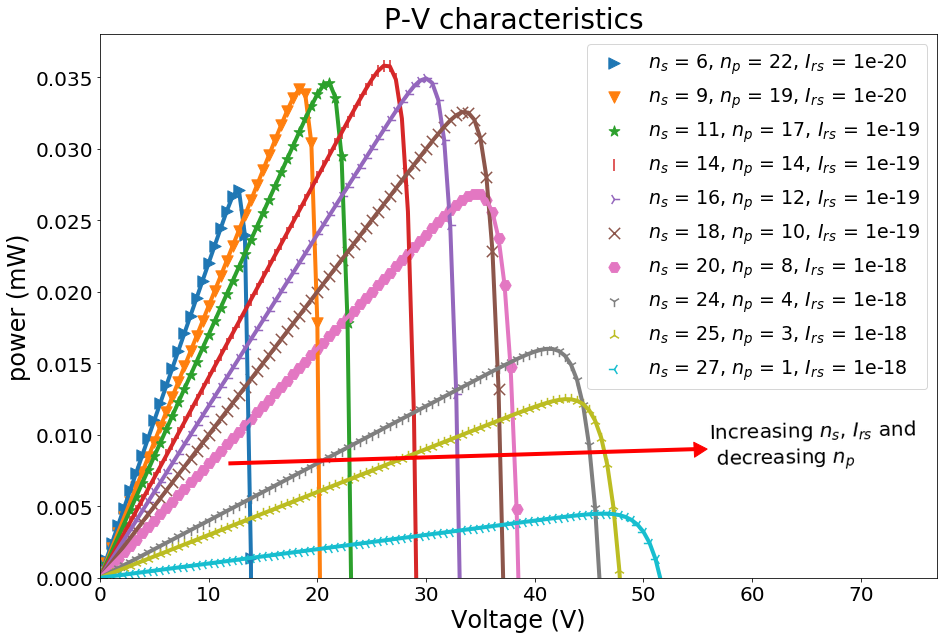

In [11]:
markers = ['>','v','*','|','4','x','H','1','2','3','D','P']
fig, ax = plt.subplots(figsize=(15,10))

x_label = [12, 55.0]
y_label = [0.008, 0.009]
text_cord = [56.0, 0.008]

for k,i in enumerate(power):
    ax.scatter(V0,i, marker=markers[k], s=2**7,
               label='$n_s$ = {}, $n_p$ = {}, $I_r$$_s$ = {}'.format(ns[k],Np[k],Irs[k]))
    ax.plot(V0,i,linewidth=4)
    ax.set_ylim(0,0.038)
    ax.set_xlim(0,77)

ax.plot(x_label, y_label,linewidth=4,c='red')  
ax.scatter(x_label[1], y_label[1],marker = (3,0,135+18), s=300,c='red')
ax.text(text_cord[0], text_cord[1] , "Increasing $n_s$, $I_{rs}$ and\n decreasing $n_p$",rotation=1,fontsize=20)


plt.legend(loc=1, prop={'size': 19})   
plt.title('P-V characteristics ',fontsize=28)
plt.xlabel('Voltage (V)',fontsize=24) 
plt.ylabel('power (mW)',fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

fig.savefig('P-V characteristicrknya.png')